## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ls

CONTRIBUTING.md    README.md          halfway-there.gif
LICENSE.md         data/              student.ipynb


# Business Case

The budding Zillow-type company, J.Hughes Inc., is buying and flipping houses in the Seattle area. They would like to know the types of housing features to prioritize to make the most profit. Knowing which features have the biggest impact on housing prices, J. Hughes Inc. could then make data-driven decisions on which houses to purchase to optimize making a profit on.

# Obtain

In [3]:
df = pd.read_csv('data/kc_house_data.csv') 
df.drop(['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],
        axis = 1, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178,47.5112,-122.257
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [4]:
# Folium map to show location of houses, use first 4 numbers of zip and latitude, houses under 1.5 million,
# houses over 1.5 million

# Scrub

In [5]:
# Check data types
df.info()
# All columns are in integer/float format which will work for now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  float64
 9   condition    21597 non-null  int64  
 10  grade        21597 non-null  int64  
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
 13  lat          21597 non-null  float64
 14  long         21597 non-null  float64
dtypes: float64(6), int64(8), object(1)
memory usage: 2.5+ MB


In [6]:
# Check for outliers in the dataset
df.describe()
# Bedrooms has an outlier of 33 rooms, watefront looks like it is categorical, as does the columns condtion and grade. 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845,47.560093,-122.213982
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072,0.138552,0.140724
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.471100,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,47.777600,-121.315000


In [7]:
# Check for null values
df.isna().sum()
# Waterfront is the only column with null values

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
lat               0
long              0
dtype: int64

### id

In [8]:
df.drop('id', axis=1, inplace=True)

### price

<AxesSubplot:>

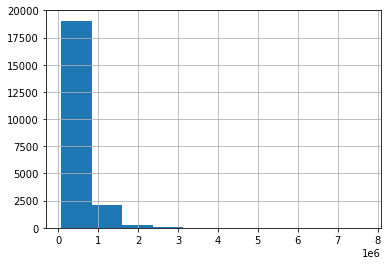

In [9]:
# hist for cont.
df['price'].hist()

In [10]:
# remove houses above 1.5 million, boolean mask
df = df[df['price'] <= 1500000]

### bedrooms

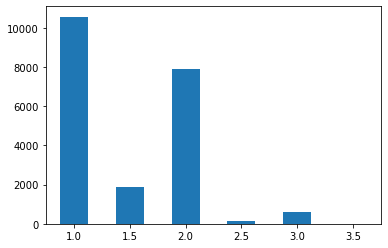

In [11]:
df['floors'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
#ordinal

### bathrooms

In [12]:
# hist, ordinal

### sqft_living

<AxesSubplot:>

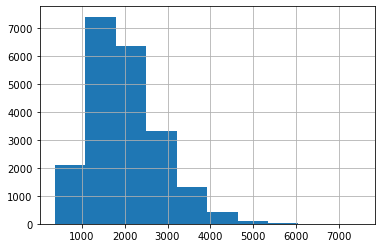

In [13]:
df['sqft_living'].hist()

### sqft_lot

<AxesSubplot:>

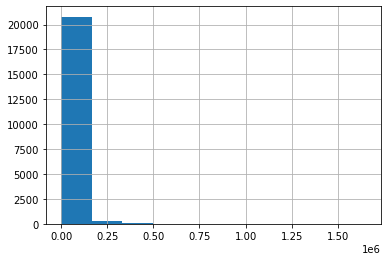

In [14]:
df['sqft_lot'].hist()

### floors

(<AxesSubplot:>,)

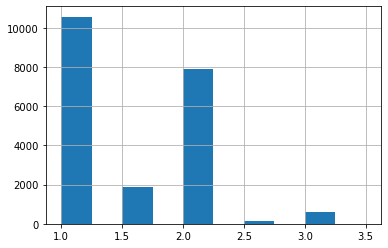

In [15]:
df['floors'].hist(), #ordinal

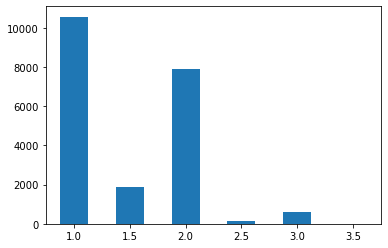

In [16]:
df['floors'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

### waterfront

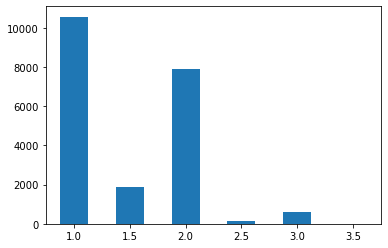

In [17]:
df['floors'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);

In [18]:
# Check for unique values
df['waterfront'].unique()

array([nan,  0.,  1.])

In [19]:
# 99% 
df['waterfront'].value_counts(normalize = True)

0.0    0.996108
1.0    0.003892
Name: waterfront, dtype: float64

In [20]:
# fill null values with 0
df['waterfront'].fillna(value = 0.0, inplace = True)

### condition

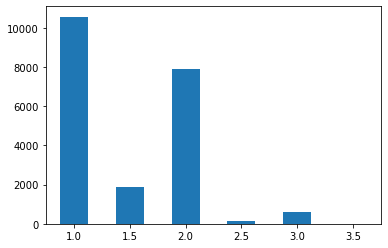

In [21]:
df['floors'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0);
# ordinal

### grade

In [22]:
# ordinal

### yr_built

### zipcode

### lat

### long

## Linearity

In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,47.5112,-122.257
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,47.7210,-122.319
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,47.7379,-122.233
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,47.5208,-122.393
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,47.6168,-122.045


In [24]:
cont = ['sqft_living', 'sqft_lot', 'yr_built']

/Users/maurinabush/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maurinabush/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maurinabush/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

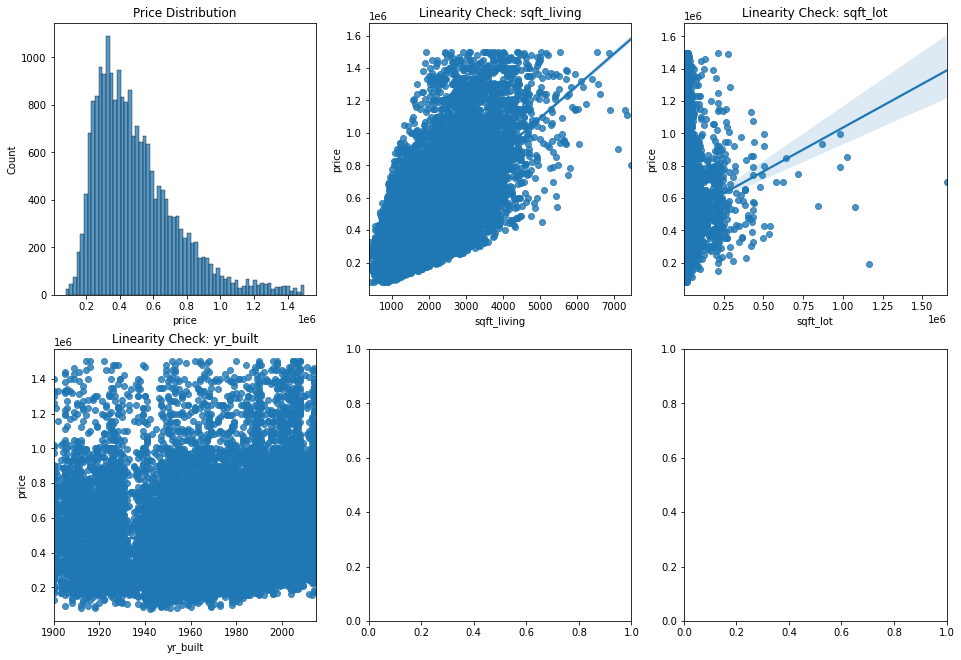

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# why a reg plot over a scatter plot?
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

## Mulicollinearity

## Homoscedasticity

# Explore

In [26]:
# Check for categorical variables

In [27]:
# Change categorical to dummy variables

In [28]:
# Different plots for cont. And cat. features

# Model

In [29]:
# Model 1 - Basic model, not a lot of features

In [30]:
# Model 2 - Included more features - grade, zipcode, maybe bedrooms

In [31]:
# Model 3 - Grade not dummy encoded

# Interpret